<a href="https://colab.research.google.com/github/ProfessorAbraham/finance-risk-analysis/blob/main/notebooks/Week_12_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ProfessorAbraham/finance-risk-analysis.git
%cd finance-risk-analysis

Cloning into 'finance-risk-analysis'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (8/8), 4.61 KiB | 4.61 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/finance-risk-analysis


In [111]:
# 1️⃣ Setup
import sys
sys.path.append("/content/finance-risk-analysis")

import pandas as pd
import matplotlib.pyplot as plt

from src.data.make_dataset import load_data, compute_log_return
from src.features.build_features import rolling_volatility
from src.models.train_model import train_change_point_model
from src.models.predict_model import get_change_point_date, quantify_shift
from src.visualization.visualize import plot_prices, plot_log_returns

In [112]:
# -------------------------
# 2️⃣ Load & Prepare Data
# -------------------------
df = load_data("/content/finance-risk-analysis/data/raw/oil_prices.csv")
df = compute_log_return(df)
df = df.dropna(subset=['log_return'])
display(df.head())

/content/finance-risk-analysis/src/data/make_dataset.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


,Price,log_return
Date,,
1987-05-21,18.45,-0.009709
1987-05-22,18.55,0.005405
1987-05-25,18.60,0.002692
1987-05-26,18.63,0.001612
1987-05-27,18.60,-0.001612


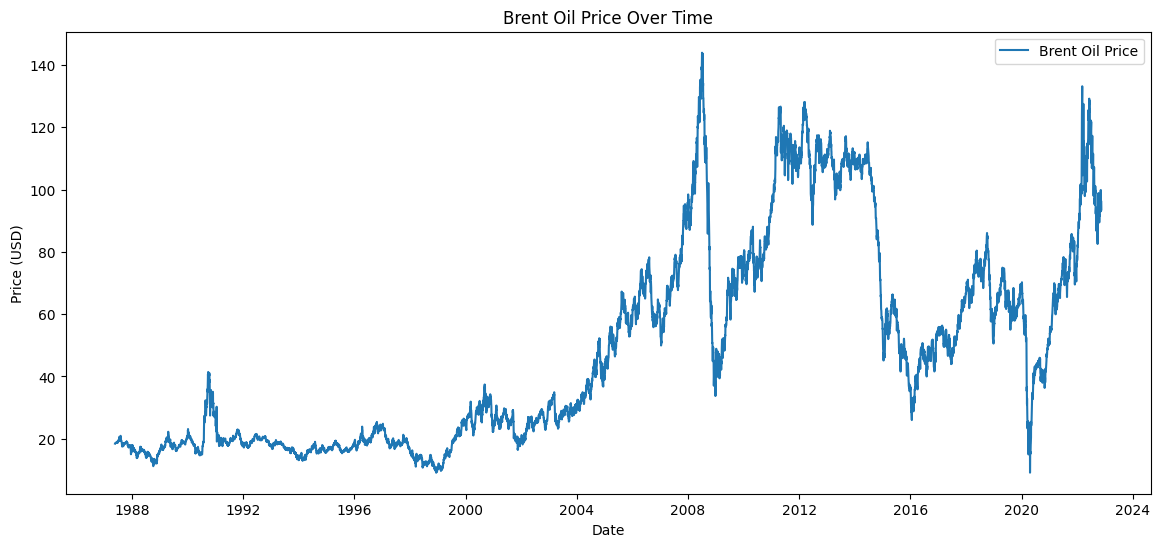

In [113]:
# -------------------------
# 3️⃣ Plot Raw Prices
# -------------------------
plot_prices(df)

In [118]:
# -------------------------
# 4️⃣ Train Bayesian Change Point Model
# -------------------------
log_returns = df['log_return'].values
trace = train_change_point_model(log_returns)
print("✅ Bayesian Change Point Model trained")

                                       Accept                Step       Grad       Sampling                       
  Progress   Draws   Tuning   Scaling   Rate       Diverge…   size       evals      Speed      Elapsed   Remaini…  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  ━━━━━━━╸   2991    False    1317.69   0.00       0          0.27       7          103.07     0:00:29   0:00:01   
                                                                                    draws/s                        
  ━━━━━━━╸   2880    False    1197.90   0.94       0          0.26       15         99.24      0:00:29   0:00:01   
                                                                                    draws/s

                                       Accept                Step       Grad       Sampling                       
  Progress   Draws   Tuning   Scaling   Rate       Diverge…   size       evals      Speed      Elapsed   Remaini…  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  ━━━━━━━━   3000    False    1317.69   0.00       0          0.27       15         103.14     0:00:29   0:00:00   
                                                                                    draws/s                        
  ━━━━━━━╸   2983    False    1197.90   0.00       0          0.26       15         101.17     0:00:29   0:00:01   
                                                                                    draws/s

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


✅ Bayesian Change Point Model trained


In [119]:
# -------------------------
# 5️⃣ Extract Change Point Date
# -------------------------
change_point = get_change_point_date(trace, df)
print(f"🔴 Most probable change point date: {change_point}")

🔴 Most probable change point date: 2017-11-22 00:00:00


In [120]:
# -------------------------
# 6️⃣ Quantify Impact of Change
# -------------------------
before, after, shift = quantify_shift(df, change_point)
print(f"Mean log return before: {before:.5f}")
print(f"Mean log return after: {after:.5f}")
print(f"Shift in mean log return: {shift:.5f}")

Mean log return before: 0.00016
Mean log return after: 0.00032
Shift in mean log return: 0.00017


In [121]:
# -------------------------
# 7️⃣ Load Events
# -------------------------
events = pd.read_csv("/content/finance-risk-analysis/data/raw/events.csv", parse_dates=['date'])
display(events.head())

,event_name,date
0,Gulf War,1990-08-02
1,Iraq Invasion,2003-03-20
2,2008 Financial Crisis,2008-09-15
3,Libyan Civil War,2011-02-15
4,OPEC Production Cut,2016-11-30


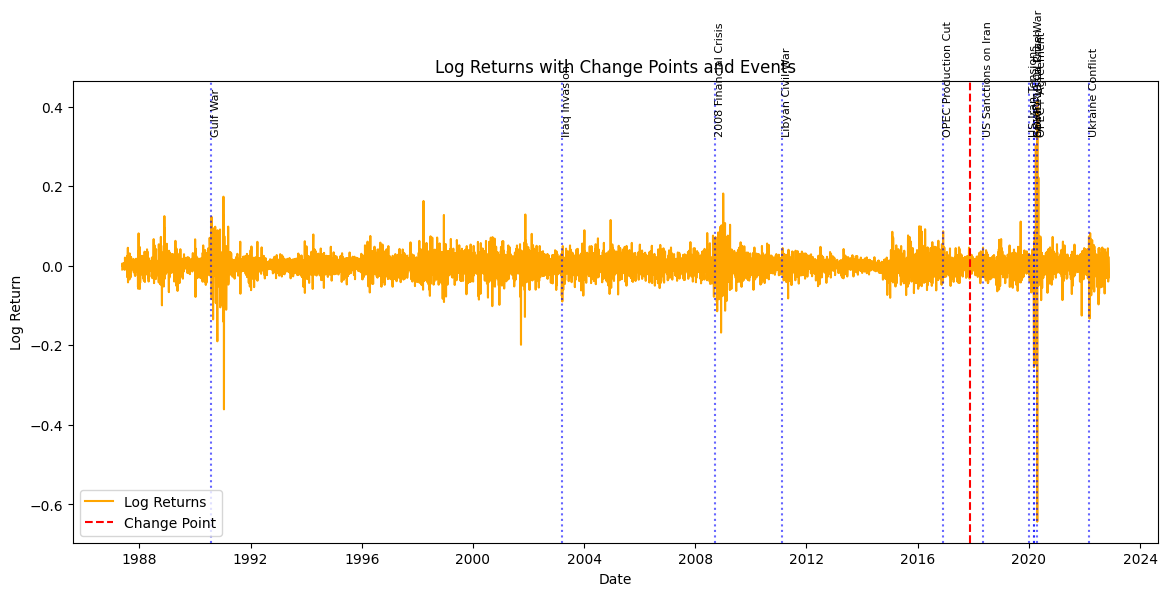

In [122]:
# -------------------------
# 8️⃣ Plot Log Returns with Change Point & Events
# -------------------------
plot_log_returns(df, change_point=change_point, events=events)


In [153]:
# If the CSV column is 'vPrice'
df = load_data("/content/finance-risk-analysis/data/raw/oil_prices.csv")# Then compute log return
df = compute_log_return(df)
df = df.dropna(subset=['log_return'])
display(df.head())

/content/finance-risk-analysis/src/data/make_dataset.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


,Price,log_return
Date,,
1987-05-21,18.45,-0.009709
1987-05-22,18.55,0.005405
1987-05-25,18.60,0.002692
1987-05-26,18.63,0.001612
1987-05-27,18.60,-0.001612


In [156]:
print(df['log_return'])

Date
1987-05-21   -0.009709
1987-05-22    0.005405
1987-05-25    0.002692
1987-05-26    0.001612
1987-05-27   -0.001612
                ...   
2022-11-08   -0.030706
2022-11-09   -0.040026
2022-11-10    0.012814
2022-11-11    0.022244
2022-11-14   -0.029271
Name: log_return, Length: 9010, dtype: float64


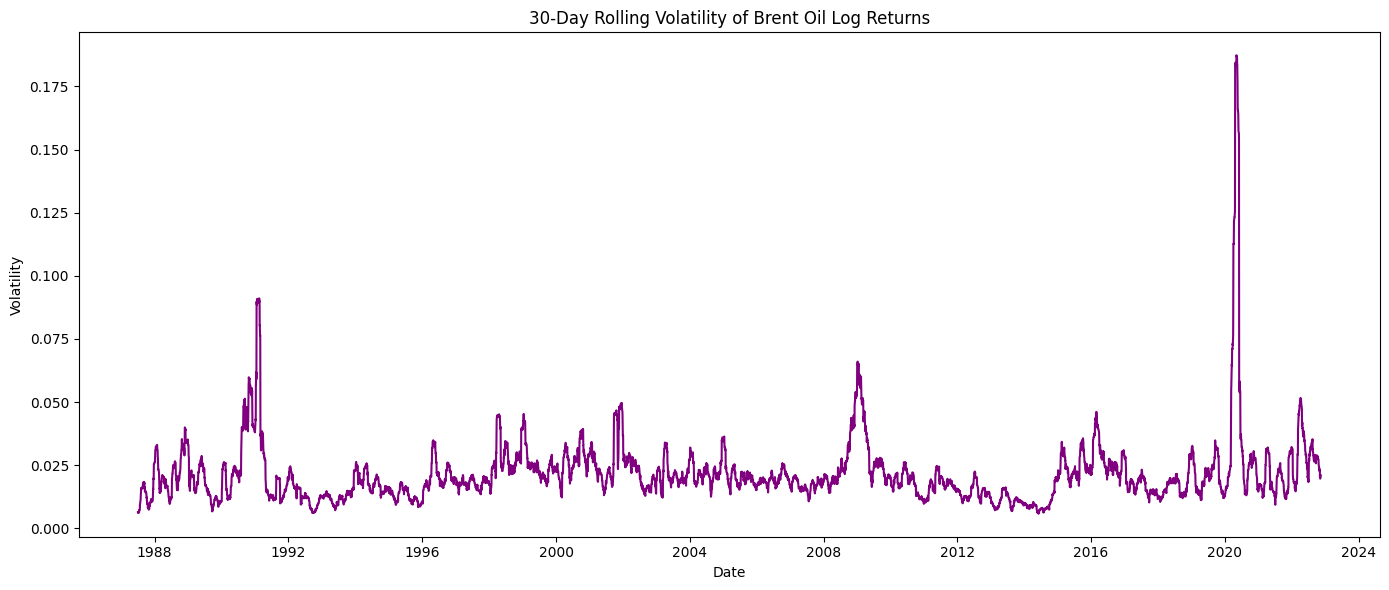

In [158]:
# -------------------------
# 9️⃣ Calculate Rolling Volatility (Safe Version)
# -------------------------
volatility_series = rolling_volatility(df)  # might return Series

# Ensure it's a DataFrame
if isinstance(volatility_series, pd.Series):
    df['volatility_30d'] = volatility_series
else:
    df = volatility_series

# Drop NaNs safely
df_plot = df.dropna(subset=['volatility_30d'])

plt.figure(figsize=(14,6))
plt.plot(df_plot.index, df_plot['volatility_30d'], color='purple')
plt.title("30-Day Rolling Volatility of Brent Oil Log Returns")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.tight_layout()
plt.show()


In [159]:
# -------------------------
# 10️⃣ Summary for Report
# -------------------------

from IPython.display import display

# Display final message
display("✅ Week 12 Final Submission Complete")

# Display key results
display(
    f"Key Results:\n"
    f"- Most probable change point date: {change_point}\n"
    f"- Mean log return before change: {before:.5f}\n"
    f"- Mean log return after change: {after:.5f}\n"
    f"- Shift in mean log return: {shift:.5f}\n"
    f"- 30-Day Rolling Volatility calculated successfully"
)

# Also print to console for clarity
print("✅ Week 12 Final Submission Complete")
print(
    f"Key Results:\n"
    f"- Most probable change point date: {change_point}\n"
    f"- Mean log return before change: {before:.5f}\n"
    f"- Mean log return after change: {after:.5f}\n"
    f"- Shift in mean log return: {shift:.5f}\n"
    f"- 30-Day Rolling Volatility calculated successfully"
)


'✅ Week 12 Final Submission Complete'

'Key Results:\n- Most probable change point date: 2017-11-22 00:00:00\n- Mean log return before change: 0.00016\n- Mean log return after change: 0.00032\n- Shift in mean log return: 0.00017\n- 30-Day Rolling Volatility calculated successfully'

✅ Week 12 Final Submission Complete
Key Results:
- Most probable change point date: 2017-11-22 00:00:00
- Mean log return before change: 0.00016
- Mean log return after change: 0.00032
- Shift in mean log return: 0.00017
- 30-Day Rolling Volatility calculated successfully
